In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.duplicated().sum()

0

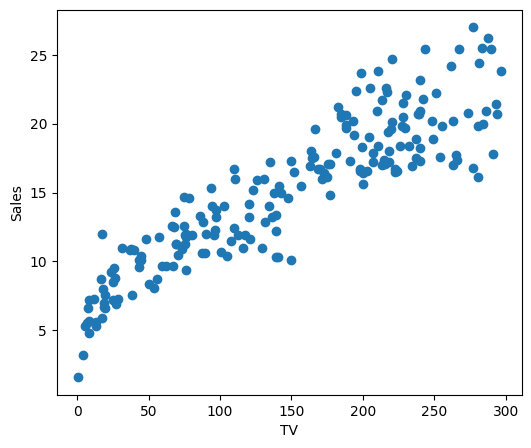

In [9]:
plt.figure(figsize=(6,5))
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

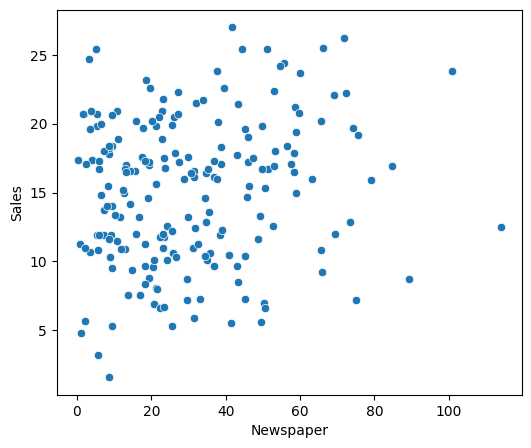

In [10]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.show()

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


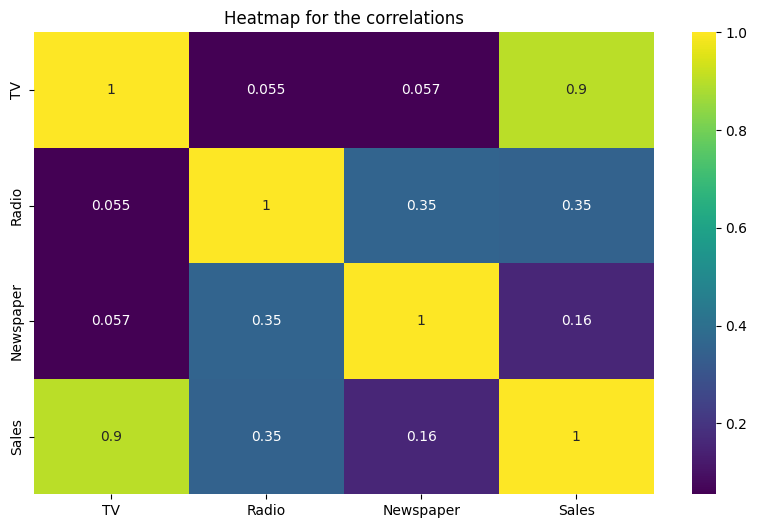

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.title("Heatmap for the correlations")
plt.show()

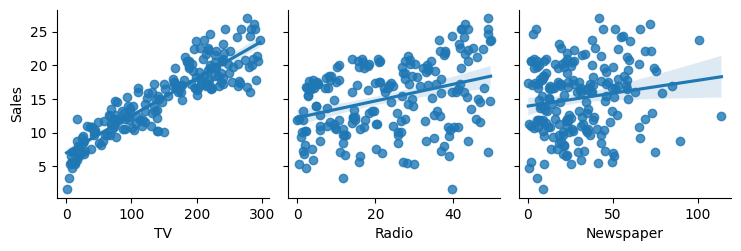

In [13]:
sns.pairplot(data = df,x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg",palette="pastel")
plt.show()

<ipython-input-14-1a923078dfc0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,x="TV",y="Sales",style="Radio",size="Newspaper",palette="pastel",legend=False)


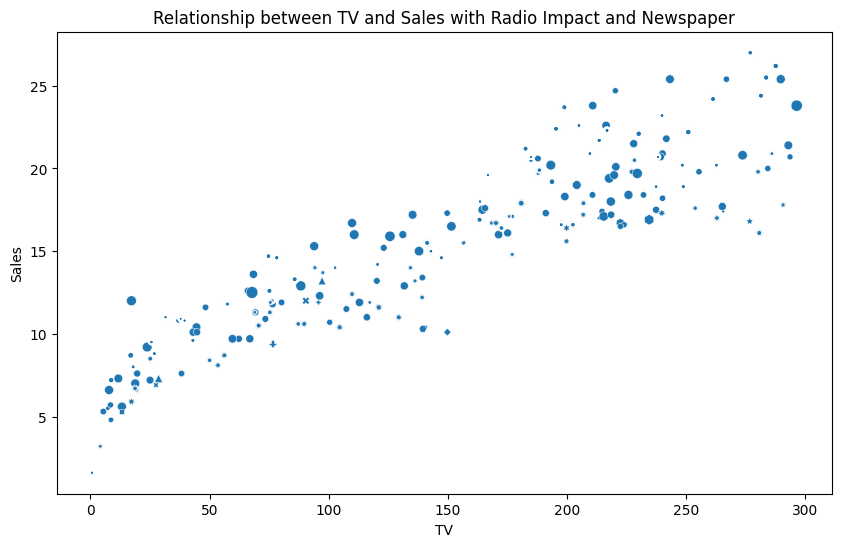

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="TV",y="Sales",style="Radio",size="Newspaper",palette="pastel",legend=False)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales with Radio Impact and Newspaper")
plt.show()

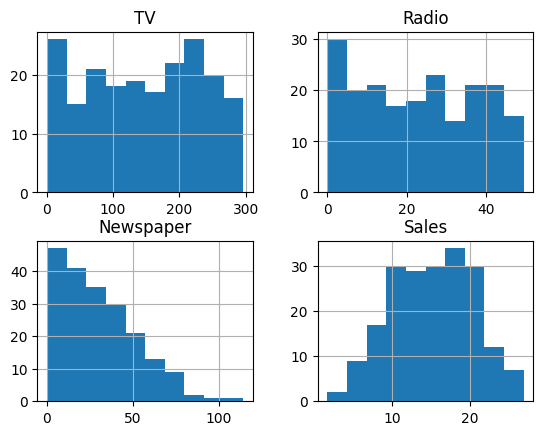

In [15]:
df.hist()
plt.show()

In [16]:
X = df.drop("Sales", axis=1)

In [17]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
y=df['Sales']

In [19]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [21]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_predictions=model.predict(X_test)

In [24]:
y_predictions

array([10.70988945,  8.68629773,  9.5778695 , 24.86207988, 14.65584473,
        8.3214275 , 10.43048002, 18.4453765 ,  9.73394291, 17.9290798 ,
       23.369886  , 10.67916356, 13.44032325, 17.17416235, 11.77380187,
       13.37072678, 21.26009906,  9.19666875, 14.13201846, 18.9260716 ,
       24.75507991, 12.48481182, 16.57130583, 13.77344772,  7.79299106,
       15.19648316, 14.71607944, 20.73862119, 17.01041859,  8.83474391,
       12.09424377, 20.74886454, 21.26147987, 21.90420095,  7.08087067,
        7.04431681,  9.15949871, 15.47796148, 13.28282334,  7.23769883])

In [25]:
from sklearn import metrics

print('MMAE:',metrics.mean_absolute_error(y_predictions,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_predictions,y_test)))
print('R-Squared',metrics.r2_score(y_predictions,y_test))

MMAE: 1.417031303060067
RMSE: 2.1266293899128947
R-Squared 0.8299802447977314
